# Importando a Base de Dados

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("datasets/tips.csv")

In [7]:
df

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## Traduzindo as Colunas

In [8]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [9]:
renomear= {'total_bill': 'valor_da_conta', 
         'tip': 'gorjeta', 
         'dessert':'sobremesa', 
         'day':'dia_da_semana', 
         'time':'hora_do_dia', 
         'size': 'total_de_pessoas'}


In [10]:
df = df.rename(columns = renomear)

In [11]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo os Campos

In [12]:
df.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [14]:
df.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [15]:
df.sobremesa = df.sobremesa.map(sim_nao)

In [16]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [17]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [18]:
df.dia_da_semana = df.dia_da_semana.map(dias)

In [19]:
df

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Dinner,3
240,27.18,2.00,Sim,Sábado,Dinner,2
241,22.67,2.00,Sim,Sábado,Dinner,2
242,17.82,1.75,Não,Sábado,Dinner,2


In [20]:
df.hora_do_dia = df.hora_do_dia.map(hora)

In [21]:
df.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

# Iniciando a Análise 

## Mapeando Valores Nulos

In [31]:
df.shape[0]

244

In [33]:
df.count()

valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Importando o Seaborn

In [23]:
import seaborn as sns

### Gráfico de Disperção

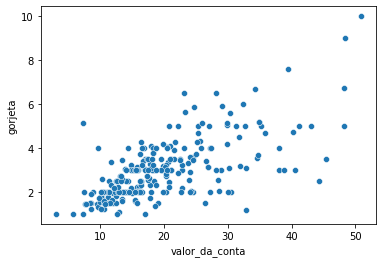

In [27]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=df)

Segundo a dispeção do gráfico, é possível notar que a gorjeta é maior com base no valor da conta 

### Verificando Se o Valor É Poporcional 

In [34]:
df.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [35]:
df ['porcentagem'] = df['gorjeta'] / df['valor_da_conta']

In [37]:
df.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [39]:
df.porcentagem = df.porcentagem.round(2)

In [40]:
df

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


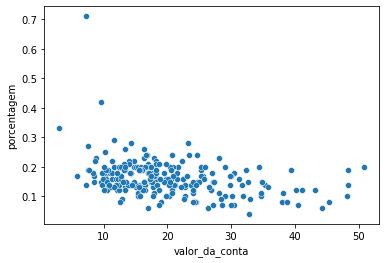

In [41]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=df)

O valor da conta não é proporcional com o da gorjeta

### Gerando Outros Gráficos 

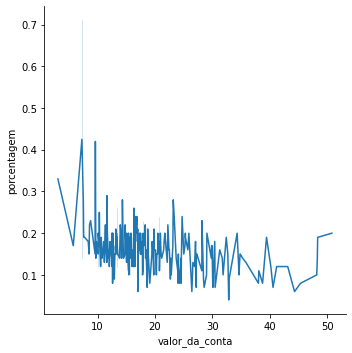

In [43]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem',kind= 'line', data=df)